In [2]:
from expander import *
import matplotlib.pyplot as plt
import time
from scipy.optimize import minimize
from random import uniform
from mpl_toolkits.mplot3d import Axes3D


plt.rcParams["figure.figsize"] = (10, 10)

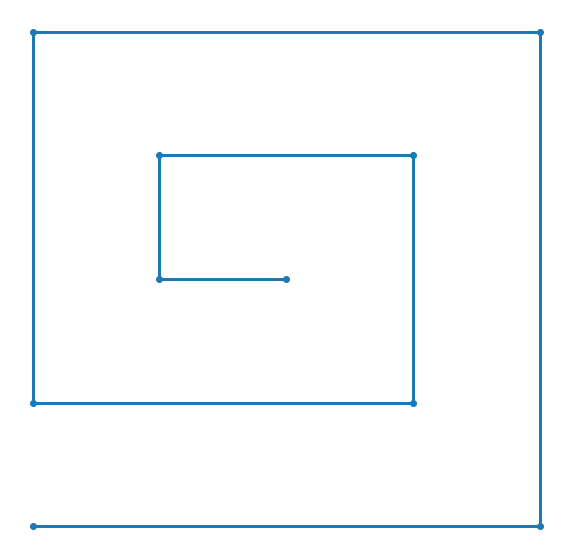

In [12]:
_=spiral(1/4,True,3)
plt.savefig('spiral.png', dpi=300)

In [ ]:
# generate a polygonal chain
coords = polygon(20)

# make into closed polygon
coords = list(coords)
coords.append(coords[0])
coords = np.array(coords)

# plot it
fig, ax = plt.subplots()
ax.axis('off')

fig.patch.set_visible(False)

ax.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')

# get total chord length
lengths, max_l = max_chord_length(coords, return_list=True)
agg_lengths = compute_agg_lengths(lengths)
max_l

In [3]:
coords=  [[0.21295919, 0.35851696],
   [0.06802981, 0.23194622],
   [0.15817489, 0.232926  ],
   [0.00582565, 0.09752227],
   [0.34000676, 0.00562013],
   [0.53053042, 0.13721739],
   [0.81967861, 0.1119647 ],
   [0.75021684, 0.2704759 ],
   [0.87309205, 0.36309878],
   [0.87791688, 0.53876695],
   [0.81544826, 0.56009931],
   [0.79406274, 0.66765483],
   [0.98578761, 0.95423054],
   [0.46199101, 0.60797504],
   [0.30335283, 0.91088259],
   [0.13880206, 0.86081325],
   [0.20784931, 0.71745157],
   [0.06261577, 0.75796288],
   [0.02995694, 0.72562561],
   [0.35119741, 0.50980796],
   [0.21295919, 0.35851696]]
coords=np.array(coords)
lengths, max_l = max_chord_length(coords, return_list=True)
agg_lengths = compute_agg_lengths(lengths)
# with open('coords.txt', 'w') as f:
#     for i in L:
#         f.write(str(i[0]))
#         f.write(',')
#         f.write(str(i[1]))
#         f.write('\n')

In [ ]:
# spiral(1/5, True)

In [4]:
# objective function
# intentionally skip pairs of points on 2 adjacent edges which cause 0 gradient
def fun(x):
    a=x[0]
    b=x[1]
    if a>=b:
        return float('inf')
    if points_on_adjacent_edge(agg_lengths, a, b):
        return float('inf')
    return max(-max_l+b-a, -b+a)/(np.linalg.norm(gamma(coords, b, agg_lengths) - gamma(coords, a, agg_lengths)))

x0=[uniform(0, max_l), uniform(0, max_l)]
bnd = [(0,max_l),(0,max_l)]
start = time.time()

# res = scipy.optimize.basinhopping(fun, x0, niter=100, T=1.0, stepsize=0.5)
# res = scipy.optimize.differential_evolution(fun, bounds=bnd, tol=1e-11)

res = scipy.optimize.dual_annealing(fun, bounds=bnd, maxiter=1000, initial_temp=5e4, visit=2.9)

# rranges = (slice(0, max_l, max_l/1000), slice(0, max_l, max_l/1000))
# res = scipy.optimize.brute(fun, rranges, full_output=True,
#                           finish=scipy.optimize.fmin)

end = time.time()
print(f'{end - start:.2f} s')
# res[0],res[1]
res

0.23 s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


     fun: -8.47931485648836
 message: ['Maximum number of iteration reached']
    nfev: 4435
    nhev: 0
     nit: 1000
    njev: 144
  status: 0
 success: True
       x: array([3.00612747, 4.26239649])

In [ ]:
i = get_edge_ind(res.x[0])
j = get_edge_ind(res.x[1])
my_list = [point1]
my_list.extend(coords[i:j-1])
my_list.extend(point2)

In [ ]:
point2

In [ ]:
my_list

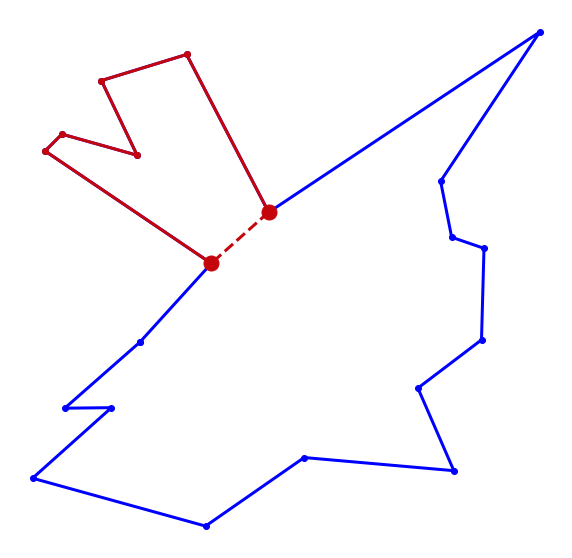

In [9]:
# plot the 2 points that attain the maximum Chord Arc Constant
fig, ax = plt.subplots()
ax.axis('off')
fig.patch.set_visible(False)
ax.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o', linewidth=3, c='#0000ff')

# point1 = gamma(coords, res[0][0])
# point2 = gamma(coords, res[0][1])

point1 = gamma(coords, res.x[0])
point2 = gamma(coords, res.x[1])


i = get_edge_ind(agg_lengths,res.x[0])
j = get_edge_ind(agg_lengths,res.x[1])
my_list = [point1]
my_list.extend(coords[i+1:j+1])
my_list.extend([np.array(point2)])

ax.plot([i[0] for i in my_list[:]],[i[1] for i in my_list[:]], '-o', c='#c5050c', linewidth=3)

ax.plot(point1[0],point1[1], '-o', c='#c5050c', markersize=15)
ax.plot(point2[0],point2[1], '-o', c='#c5050c', markersize=15)

ax.plot([point1[0],point2[0]], [point1[1],point2[1]], '#c5050c', linestyle="--", linewidth=3)

# plt.plot(gamma(coords, 4)[0],gamma(coords, 4)[1], '-o', c='y', markersize=15)
# plt.plot(gamma(coords, 3.8)[0],gamma(coords, 3.8)[1], '-o', c='g', markersize=15)
plt.savefig('CA_def.png', dpi=300)